# Implementation of the UNet Semantic Segmentation Architecture

In [1]:
import torch
import torch.nn as nn
import torchvision

In [2]:
class Encode_Block(nn.Module):    
    
    def __init__(self,channel_in,channel_out, filter_size, pool_size):
        super(Encode_Block, self).__init__()
        self.conv1 = nn.Conv2d(channel_in, channel_out, filter_size)
        self.r1 = nn.ReLU()
        self.conv2 = nn.Conv2d(channel_out, channel_out, filter_size)
        self.r2 = nn.ReLU()
        self.mp = nn.MaxPool2d(pool_size , stride=2)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.r1(out)
        out = self.conv2(out)
        out = self.r2(out)
        cache=out
        out = self.mp(out)
    
        return out, cache
    
class Decode_Block(nn.Module):
    
    def __init__(self, channel_in, channel_out, upconv_size, filter_size):
        super(Decode_Block, self).__init__()
        self.upconv1 = nn.ConvTranspose2d(channel_in, channel_out, upconv_size, stride=2)
        self.conv1 = nn.Conv2d(channel_in, channel_out, filter_size)
        self.r1 = nn.ReLU()
        self.conv2 = nn.Conv2d(channel_out, channel_out, filter_size)
        self.r2 = nn.ReLU()
        self.conv3 = nn.Conv2d(channel_out, channel_out, filter_size)
        self.r3 = nn.ReLU()

    def forward(self,x, cache):
        out = self.upconv1(x)
        crop = torchvision.transforms.CenterCrop(out.shape[2:4])
        cropped = crop(cache)
        out = torch.cat((cropped,out),dim=1)
        out = self.conv1(out)
        out = self.r1(out)
        out = self.conv2(out)
        out = self.r2(out)
        out = self.conv3(out)
        out = self.r3(out)
    
        return out
    
class UNet(nn.Module):
    
    def __init__(self):
        super(UNet, self).__init__()
        self.Encoder1 = Encode_Block(3, 64, 3, 2)
        self.Encoder2 = Encode_Block(64, 128, 3, 2)
        self.Encoder3 = Encode_Block(128, 256, 3, 2)
        self.Encoder4 = Encode_Block(256, 512, 3, 2)
        
        self.conv1=nn.Conv2d(512, 1024, 3)
        self.conv2=nn.Conv2d(1024, 1024, 3)
        
        self.Decoder1  = Decode_Block(1024, 512, 2, 3)
        self.Decoder2  = Decode_Block(512, 256, 2, 3)
        self.Decoder3  = Decode_Block(256, 128, 2, 3)
        self.Decoder4  = Decode_Block(128, 64, 2, 3)
        
        self.conv3 = nn.Conv2d(64,64,3)
        self.conv4 = nn.Conv2d(64,3,1)
        
        self.sftmax = nn.Softmax(dim=1)
        
        
    def forward(self,x):
        
        out, cache1 = self.Encoder1(x)
        out, cache2 = self.Encoder2(out)
        out, cache3 = self.Encoder3(out)
        out, cache4 = self.Encoder4(out)
        out = self.conv1(out)
        out = self.conv2(out)
        out = self.Decoder1(out, cache4)
        out = self.Decoder2(out, cache3)
        out = self.Decoder3(out, cache2)
        out = self.Decoder4(out, cache1)
        out = self.conv3(out)
        out = self.conv4(out)
        resize = torchvision.transforms.Resize((572, 572),interpolation=torchvision.transforms.InterpolationMode.BICUBIC)
        out = resize(out)
    
        return out
        
        
    
model  = UNet()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, betas=(0.9,0.999), eps=1e-8)
      
        

In [3]:
x = torch.randint(0, 256, (5, 3, 572, 572),dtype=torch.float32)
y = torch.full((5, 3, 572.572))
out = model.forward(x)

In [ ]:
for i in range(num_epochs):
    scores = model.forward(x)
    
    loss
    

In [7]:
print(x[1].shape)

torch.Size([3, 572, 572])


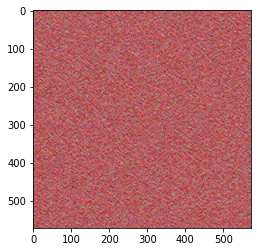

In [10]:
to_image = torchvision.transforms.ToPILImage()

img = to_image(out[1])
inp = to_image(x[1])

from matplotlib import pyplot as plt
plt.imshow(img)